In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Load the dataset


In [36]:


df = pd.read_csv(r'Amazon Sale Report.csv', encoding='unicode_escape', low_memory=False)


In [37]:
df.shape

(128975, 24)

In [38]:
df.head(10)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,...,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,NaN,False,NaN,NaN


# # Cleaning DataSet

In [39]:
# Drop unnecessary columns
# The last column (Unnamed: 22) seems to be empty or irrelevant, so we'll drop it.
# We'll also drop 'promotion-ids' if we deem it unnecessary for the analysis.
df_cleaned = df.drop(columns=['Unnamed: 22', 'promotion-ids'])

# Check for missing values in the dataset
missing_values = df_cleaned.isnull().sum()

# Convert data types
# Convert 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%m-%d-%y')

# Handle mixed data types by converting 'ship-postal-code' to string
df_cleaned['ship-postal-code'] = df_cleaned['ship-postal-code'].astype(str)

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Display summary of missing values and data types
cleaned_summary = {
    "missing_values": missing_values,
    "dtypes": df_cleaned.dtypes
}

cleaned_summary


{'missing_values': index                     0
 Order ID                  0
 Date                      0
 Status                    0
 Fulfilment                0
 Sales Channel             0
 ship-service-level        0
 Style                     0
 SKU                       0
 Category                  0
 Size                      0
 ASIN                      0
 Courier Status         6872
 Qty                       0
 currency               7795
 Amount                 7795
 ship-city                33
 ship-state               33
 ship-postal-code         33
 ship-country             33
 B2B                       0
 fulfilled-by          89698
 dtype: int64,
 'dtypes': index                          int64
 Order ID                      object
 Date                  datetime64[ns]
 Status                        object
 Fulfilment                    object
 Sales Channel                 object
 ship-service-level            object
 Style                         object
 SKU           

In [40]:
df_cleaned['ship-city'] = df_cleaned['ship-city'].fillna('Unknown')
df_cleaned['ship-state'] = df_cleaned['ship-state'].fillna('Unknown')
df_cleaned['ship-postal-code'] = df_cleaned['ship-postal-code'].fillna('00000')
df_cleaned['ship-country'] = df_cleaned['ship-country'].fillna('Unknown')


In [41]:
# Convert all state names to lowercase and strip any leading/trailing whitespace
df['ship-state'] = df['ship-state'].str.lower().str.strip()

# Verify the changes
print(df['ship-state'].unique())


['maharashtra' 'karnataka' 'puducherry' 'tamil nadu' 'uttar pradesh'
 'chandigarh' 'telangana' 'andhra pradesh' 'rajasthan' 'delhi' 'haryana'
 'assam' 'jharkhand' 'chhattisgarh' 'odisha' 'kerala' 'madhya pradesh'
 'west bengal' 'nagaland' 'gujarat' 'uttarakhand' 'bihar'
 'jammu & kashmir' 'punjab' 'himachal pradesh' 'arunachal pradesh'
 'manipur' 'goa' 'meghalaya' 'tripura' 'ladakh' 'dadra and nagar' 'sikkim'
 nan 'andaman & nicobar' 'rajshthan' 'nl' 'mizoram' 'new delhi'
 'punjab/mohali/zirakpur' 'rj' 'orissa' 'lakshadweep' 'pb' 'apo' 'ar'
 'pondicherry' 'rajsthan']


In [42]:
# Convert all state names to uppercase and strip any leading/trailing whitespace
df['ship-state'] = df['ship-state'].str.upper().str.strip()

# Verify the changes
print(df['ship-state'].unique())


['MAHARASHTRA' 'KARNATAKA' 'PUDUCHERRY' 'TAMIL NADU' 'UTTAR PRADESH'
 'CHANDIGARH' 'TELANGANA' 'ANDHRA PRADESH' 'RAJASTHAN' 'DELHI' 'HARYANA'
 'ASSAM' 'JHARKHAND' 'CHHATTISGARH' 'ODISHA' 'KERALA' 'MADHYA PRADESH'
 'WEST BENGAL' 'NAGALAND' 'GUJARAT' 'UTTARAKHAND' 'BIHAR'
 'JAMMU & KASHMIR' 'PUNJAB' 'HIMACHAL PRADESH' 'ARUNACHAL PRADESH'
 'MANIPUR' 'GOA' 'MEGHALAYA' 'TRIPURA' 'LADAKH' 'DADRA AND NAGAR' 'SIKKIM'
 nan 'ANDAMAN & NICOBAR' 'RAJSHTHAN' 'NL' 'MIZORAM' 'NEW DELHI'
 'PUNJAB/MOHALI/ZIRAKPUR' 'RJ' 'ORISSA' 'LAKSHADWEEP' 'PB' 'APO' 'AR'
 'PONDICHERRY' 'RAJSTHAN']


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [44]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [45]:
df[['Qty','Amount']].describe()

,Qty,Amount
count,128975.000000,121180.000000
mean,0.904431,648.561465
std,0.313354,281.211687
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,15.000000,5584.000000


In [46]:
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')

# Verify the conversion
print(df['Date'].head())


0   2022-04-30
1   2022-04-30
2   2022-04-30
3   2022-04-30
4   2022-04-30
Name: Date, dtype: datetime64[ns]


 # EXPLORATORY DATA ANALYSIS

In [47]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

# TIME 

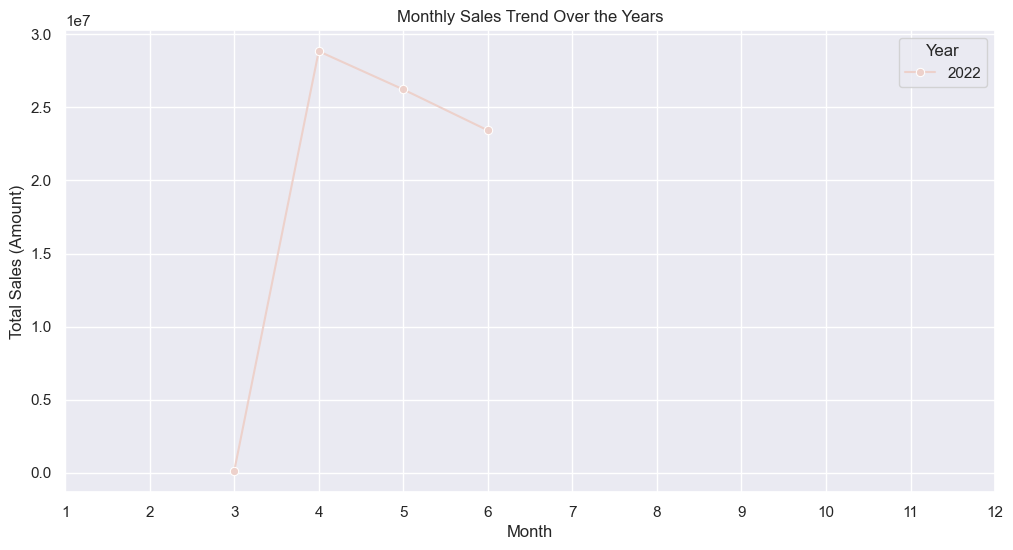

In [48]:
# Extract year and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by Year and Month to get the total sales
sales_trend = df.groupby(['Year', 'Month'])['Amount'].sum().reset_index()

# Plotting Sales Trends Over Time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x='Month', y='Amount', hue='Year', marker='o')
plt.title('Monthly Sales Trend Over the Years')
plt.ylabel('Total Sales (Amount)')
plt.xlabel('Month')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.show()


In [49]:
df['Year-Month'] = df['Date'].dt.to_period('M')

# Group by Year-Month to get total sales
sales_trend = df.groupby('Year-Month')['Amount'].sum().reset_index()

# Verify the DataFrame
print(sales_trend.head())

  Year-Month       Amount
0    2022-03    101683.85
1    2022-04  28838708.32
2    2022-05  26226476.75
3    2022-06  23425809.38


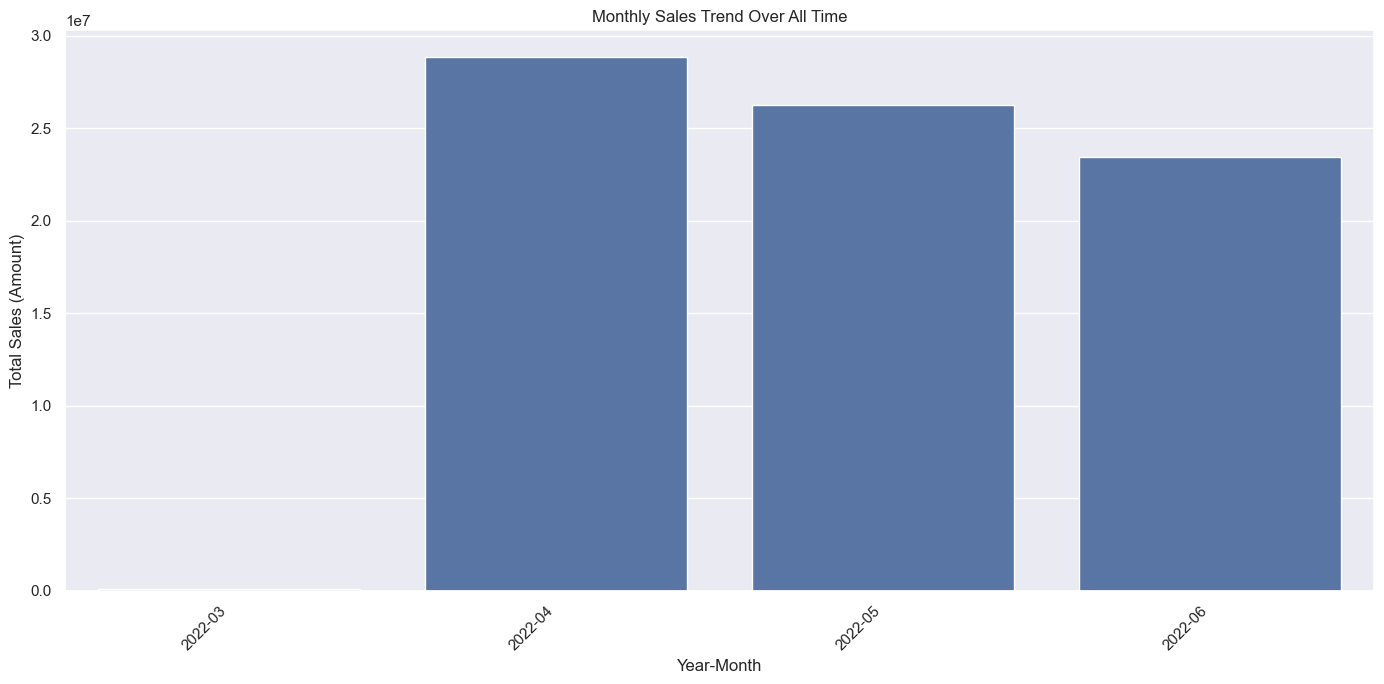

In [50]:
plt.figure(figsize=(14, 7))
sns.barplot(data=sales_trend, x='Year-Month', y='Amount')
plt.title('Monthly Sales Trend Over All Time')
plt.ylabel('Total Sales (Amount)')
plt.xlabel('Year-Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

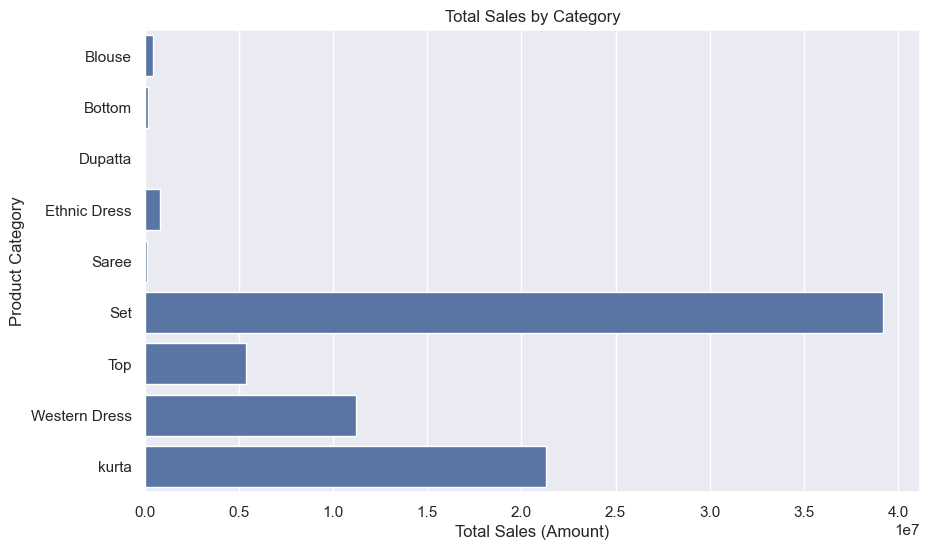

In [51]:
# Group by Category to get total sales
category_sales = df.groupby('Category')['Amount'].sum().reset_index()

# Plotting Category Performance
plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x='Amount', y='Category')
plt.title('Total Sales by Category')
plt.xlabel('Total Sales (Amount)')
plt.ylabel('Product Category')
plt.show()

# States

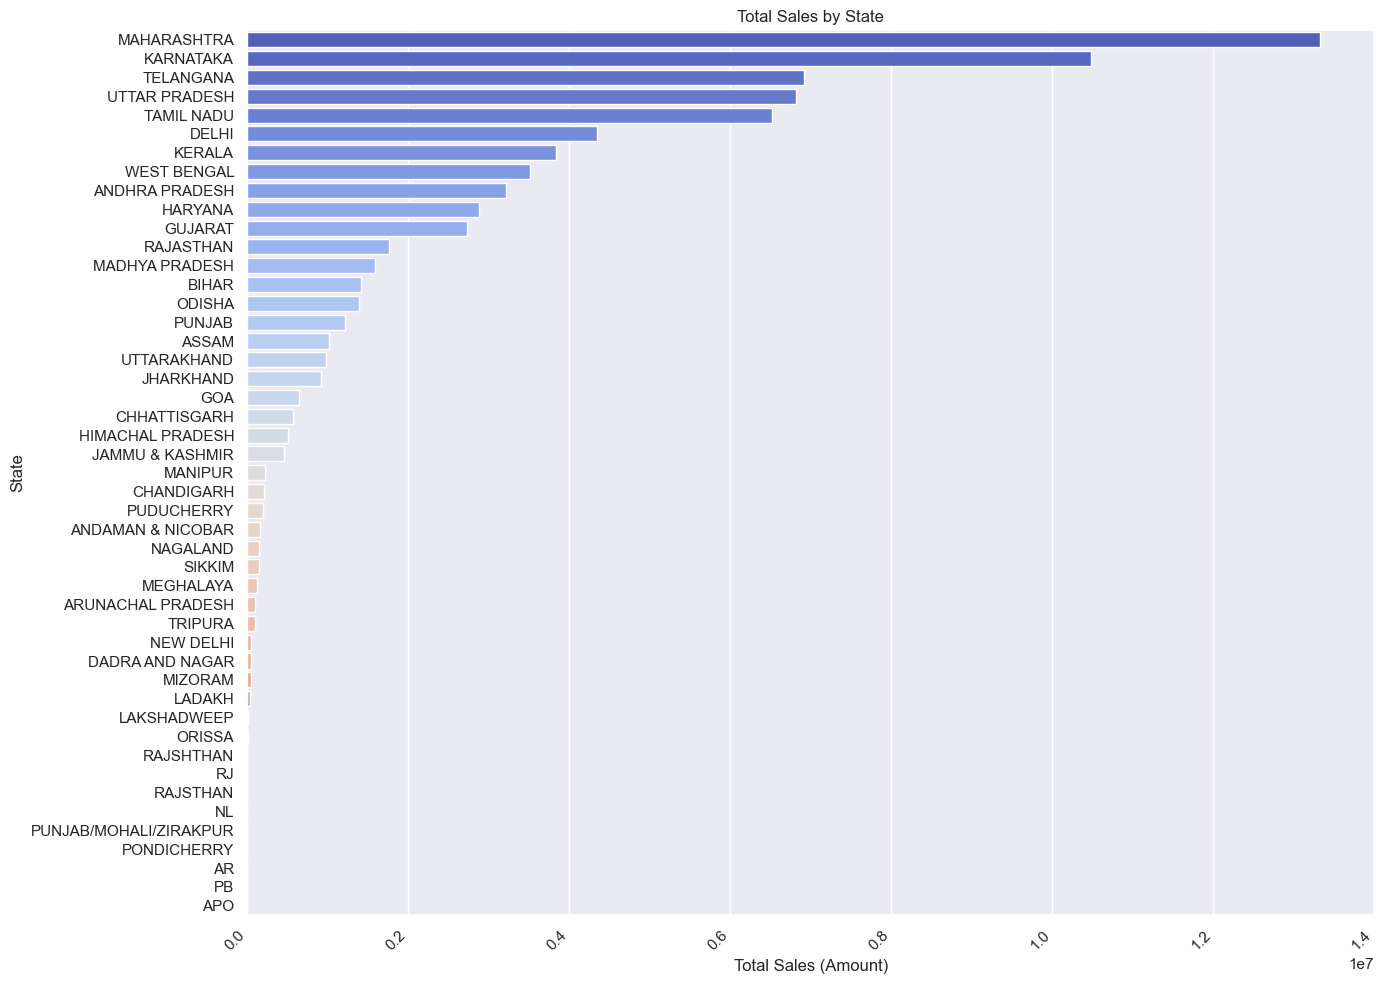

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and cleaned

# Group by State to get total sales
state_sales_total = df.groupby('ship-state')['Amount'].sum().reset_index()

# Sort states by total sales in descending order
state_sales_total = state_sales_total.sort_values(by='Amount', ascending=False)

# Increase the figure size and rotate the labels for better readability

plt.figure(figsize=(14, 10))
sns.barplot(data=state_sales_total, x='Amount', y='ship-state', hue='ship-state', palette='coolwarm', legend=False)
plt.title('Total Sales by State')
plt.xlabel('Total Sales (Amount)')
plt.ylabel('State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust the plot to make room for labels
plt.show()

#### The Above graphs shows that Sales is high from Metro cites

In [53]:
df.columns


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22', 'Year', 'Month', 'Year-Month'],
      dtype='object')

<Axes: xlabel='ship-state', ylabel='Amount'>

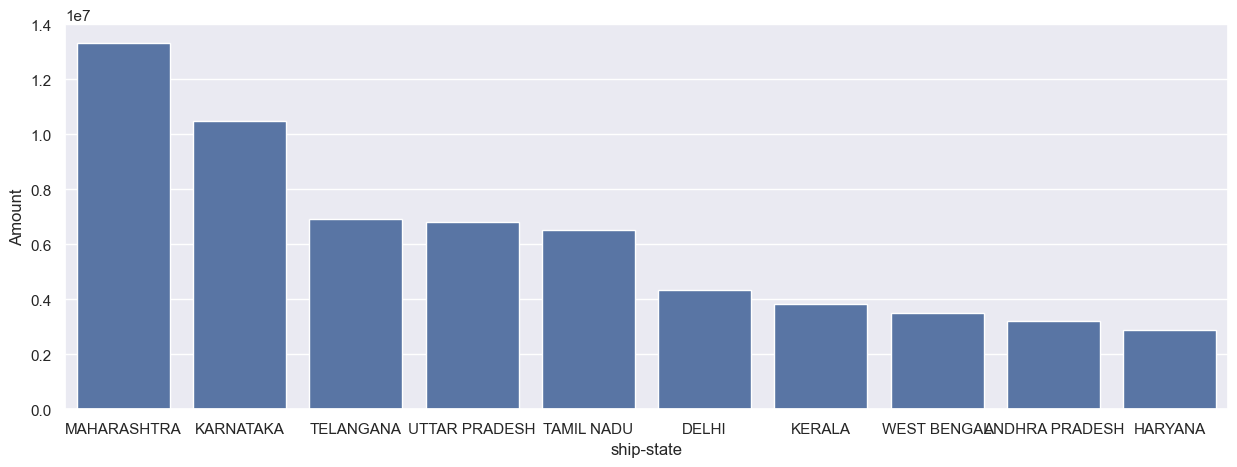

In [54]:
sales_state = df.groupby(['ship-state'], as_index=False)['Amount'].sum().sort_values(by='Amount' , ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state, x='ship-state',y='Amount')

*we can see that most of the states are from maharashtra karnatka telangana , south

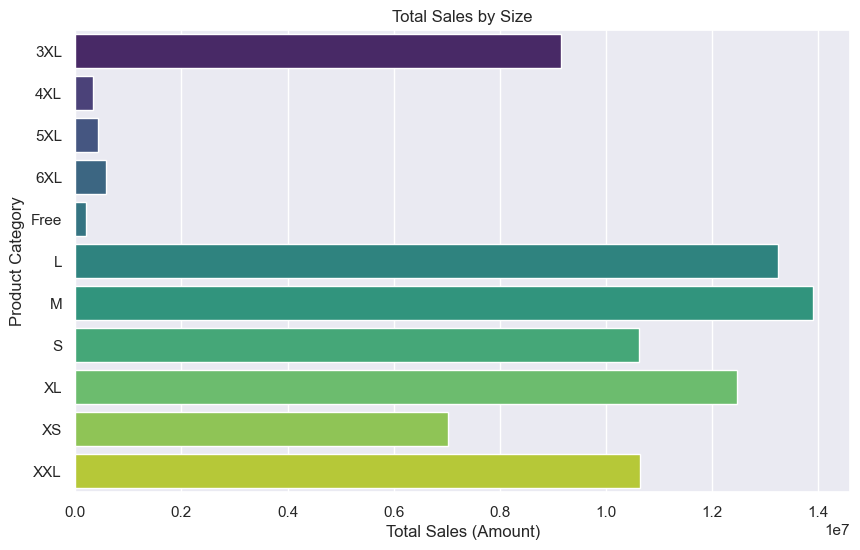

In [55]:

# Grouping the data by 'Size' to get total sales for each size category
category_sales = df.groupby('Size')['Amount'].sum().reset_index()

# Plotting Category Performance
plt.figure(figsize=(10, 6))

# Assign 'Size' to hue and set legend=False, then use palette
sns.barplot(data=category_sales, x='Amount', y='Size', hue='Size', palette='viridis', legend=False)

plt.title('Total Sales by Size')
plt.xlabel('Total Sales (Amount)')
plt.ylabel('Product Category')
plt.show()


By this we can analyse that which size needs to made more, which has high demand sale

# How many products actually deliverd and not cancel

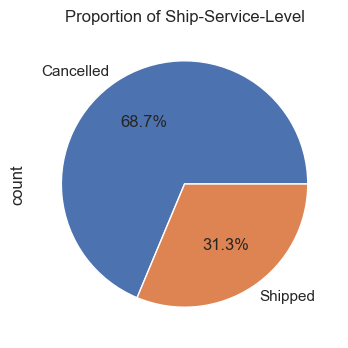

In [56]:
# Pie chart of Ship-Service-Level
plt.figure(figsize=(6, 4))
df["ship-service-level"].value_counts().plot(kind="pie", autopct="%1.1f%%", labels=['Cancelled', 'Shipped'])
plt.title("Proportion of Ship-Service-Level")
plt.show()

we can see that the product are cancelling much

# Top selling category

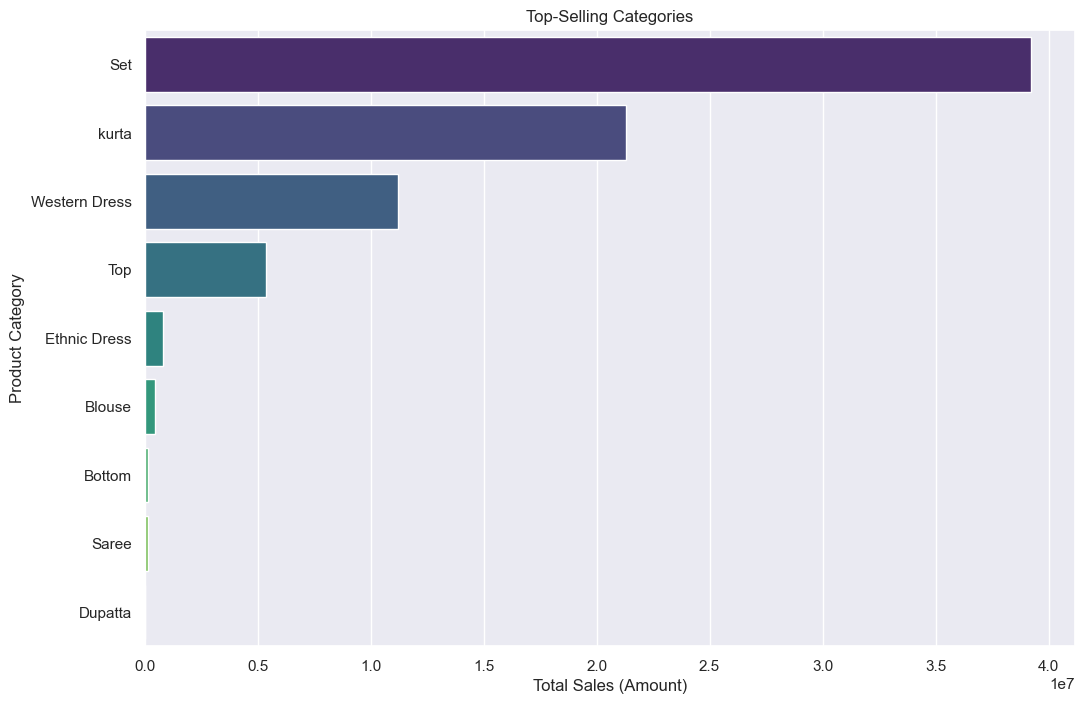

In [57]:
# Assuming df is already loaded and cleaned

# Group by Category to get total sales
category_sales = df.groupby('Category')['Amount'].sum().reset_index()

# Sort categories by total sales in descending order
category_sales = category_sales.sort_values(by='Amount', ascending=False)

# Plotting Top-Selling Categories
plt.figure(figsize=(12, 8))

# Assign 'Category' to hue and set legend=False, then use palette
sns.barplot(data=category_sales, x='Amount', y='Category', hue='Category', palette='viridis', dodge=False, legend=False)

plt.title('Top-Selling Categories')
plt.xlabel('Total Sales (Amount)')
plt.ylabel('Product Category')
plt.show()

# Sales Over Time by Region

In [ ]:
# Convert the 'Amount' column to numeric, forcing invalid parsing to NaN
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Drop rows where 'Amount' is NaN
df = df.dropna(subset=['Amount'])


